In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import discriminant_analysis
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import feature_extraction
from sklearn import datasets
import math

# from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

#READING RAW DATA
my_data=pd.read_csv('new_data.csv',delimiter=',')
X= my_data.iloc[:,1:]
print(X)


       year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  Is  Ir
0      2010      1    2     0    129   -16  -4.0  1020.0   SE    1.79   0   0
1      2010      1    2     1    148   -15  -4.0  1020.0   SE    2.68   0   0
2      2010      1    2     2    159   -11  -5.0  1021.0   SE    3.57   0   0
3      2010      1    2     3    181    -7  -5.0  1022.0   SE    5.36   1   0
4      2010      1    2     4    138    -7  -5.0  1022.0   SE    6.25   2   0
5      2010      1    2     5    109    -7  -6.0  1022.0   SE    7.14   3   0
6      2010      1    2     6    105    -7  -6.0  1023.0   SE    8.93   4   0
7      2010      1    2     7    124    -7  -5.0  1024.0   SE   10.72   0   0
8      2010      1    2     8    120    -8  -6.0  1024.0   SE   12.51   0   0
9      2010      1    2     9    132    -7  -5.0  1025.0   SE   14.30   0   0
10     2010      1    2    10    140    -7  -5.0  1026.0   SE   17.43   1   0
11     2010      1    2    11    152    -8  -5.0  1026.0   SE   

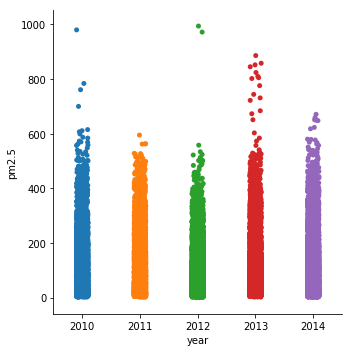

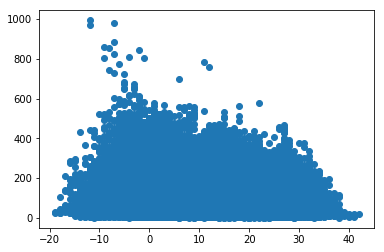

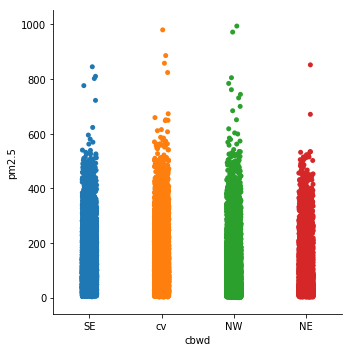

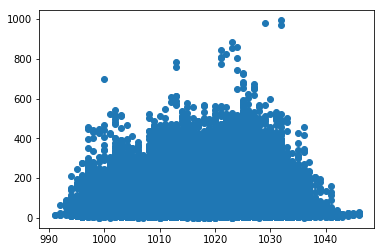

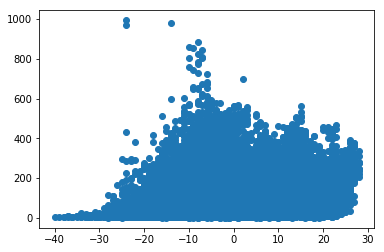

In [115]:
import seaborn as sns
sns.catplot(x="year", y="pm2.5", data=X)
# sns.catplot(x="month", y="pm2.5", data=X)
plt.figure()
plt.scatter(x="TEMP", y="pm2.5", data=X)
plt.show()
sns.catplot(x="cbwd", y="pm2.5", data=X)
plt.figure()
plt.scatter(x="PRES", y="pm2.5", data=X)
plt.show()
plt.figure()
plt.scatter(x="DEWP", y="pm2.5", data=X)
plt.show()

In [116]:
#Identifying Data and Labels
data_op = X.iloc[:,4]
data = X.iloc[:,[0,1,2,3,5,6,7,8,9,10,11]]

#CATEGROICAL TO NUMBERS
le = preprocessing.LabelEncoder()
for i in range(0,4):    
    Y = le.fit_transform(data.iloc[:,i])
    data.iloc[:,i] =Y

    
Y = le.fit_transform(data.iloc[:,7])
data.iloc[:,7] =Y
# Y = le.fit_transform(X.ix[:,19])
# X.ix[:,19] =Y



data = data.as_matrix()
data = np.array(data)
data_op = data_op.as_matrix()
data_op = np.array(data_op)

#ONE HOT ENCODING OF CATEGORICAL FEATURES
ohe = preprocessing.OneHotEncoder(n_values='auto', categorical_features= [0,1,2,3,7],sparse = False,handle_unknown='error')
data=ohe.fit_transform(data)


C:\Users\nived\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\nived\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\nived\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [117]:
training_1 , pretraining, training_1_op, pretraining_op = train_test_split(data, data_op, test_size=0.1)
training, test, training_op,test_op = train_test_split(training_1,training_1_op,test_size = 0.25)

In [118]:
print(np.shape(training_1))
print(np.shape(pretraining))
# print(np.shape(training_1_op,pretraining_op))
print(np.shape(training))
print(np.shape(test))
print(np.shape(training_op))
print(np.shape(test_op))


(37581, 82)
(4176, 82)
(28185, 82)
(9396, 82)
(28185,)
(9396,)


In [119]:
#Pretraining Processing
pretraining_train, pretraining_test, pretraining_train_op,pretraining_test_op = train_test_split(pretraining,pretraining_op,test_size = 0.1)


In [120]:
# print(pretraining_train[0,:])
# print(pretraining_train[1,:])
print(np.shape(pretraining_train))

(3758, 82)


In [121]:
#Approach 1: No preprocesing or feature selection
lin = LinearRegression()
lin.fit(pretraining_train,pretraining_train_op)
#TRAIN eval
pretraining_train_op_predict = lin.predict(pretraining_train)
mse_train_orig = mean_absolute_error(pretraining_train_op,pretraining_train_op_predict)
print("R2 SCore for Train UnNormalized",r2_score(pretraining_train_op,pretraining_train_op_predict))
print("MSE for unprocessed train data: ",mse_train_orig)
#Test Eval
pretraining_test_op_predict = lin.predict(pretraining_test)
mse_test_orig = mean_absolute_error(pretraining_test_op,pretraining_test_op_predict)
print("R2 SCore for Test UnNormalized",r2_score(pretraining_test_op,pretraining_test_op_predict))
print("MSE for unprocessed test data: ",mse_test_orig)


#Approach 2: Normalization
ss = StandardScaler()
pretraining_train_norm = np.copy(pretraining_train)
pretraining_test_norm = np.copy(pretraining_test)
ss.fit(pretraining_train_norm[:,76:82])
Y = ss.transform(pretraining_train_norm[:,76:82])
pretraining_train_norm[:,76:82] = Y

Y = ss.transform(pretraining_test_norm[:,76:82])
pretraining_test_norm[:,76:82] = Y


lin.fit(pretraining_train_norm,pretraining_train_op)

#train eval
pretraining_train_op_predict_norm = lin.predict(pretraining_train_norm)
# print(pretraining_train_op_predict_norm)
mse_norm = mean_absolute_error(pretraining_train_op,pretraining_train_op_predict_norm)
print("R2 Score for Train Normalized",r2_score(pretraining_train_op,pretraining_train_op_predict_norm))
print("MSE for normalized data: ",mse_norm)
#test eval
pretraining_test_op_predict_norm = lin.predict(pretraining_test_norm)
# print(pretraining_test_op_predict_norm)
mse_norm = mean_absolute_error(pretraining_test_op,pretraining_test_op_predict_norm)
print("R2 SCore for Test Normalized",r2_score(pretraining_test_op,pretraining_test_op_predict_norm))
print("MSE for normalized data: ",mse_norm)

R2 SCore for Train UnNormalized 0.402168798570797
MSE for unprocessed train data:  53.751563851283926
R2 SCore for Test UnNormalized 0.37963129318474664
MSE for unprocessed test data:  53.656450919557415
R2 Score for Train Normalized 0.40219049350777125
MSE for normalized data:  53.74337662985631
R2 SCore for Test Normalized 0.38061188214099595
MSE for normalized data:  53.62324312200957


In [122]:
#PCA for Pretraining
for i in range(1,83):
#     print(i)
    feat_redn = PCA(n_components = i)
    feat_redn.fit(pretraining_train_norm)
    pretraining_train_red = feat_redn.transform(pretraining_train_norm)
    pretraining_test_red = feat_redn.transform(pretraining_test_norm)


    lin.fit(pretraining_train_red,pretraining_train_op)

    #train eval

    pretraining_train_op_predict_red = lin.predict(pretraining_train_red)
    mse_red = mean_absolute_error(pretraining_train_op,pretraining_train_op_predict_red)
#     print("MSE for PCA train data: ",mse_red)

    #test eval
    pretraining_test_op_predict_red = lin.predict(pretraining_test_red)
    mse_red = mean_absolute_error(pretraining_test_op,pretraining_test_op_predict_red)
    print(i,'\t',mse_red)
#     print("MSE for PCA test data: ",mse_red)

1 	 69.79257472231185
2 	 68.67745832612066
3 	 68.67755770191566
4 	 67.11993508814649
5 	 66.84296546494174
6 	 65.91495778242049
7 	 64.58403321007232
8 	 64.47221325233753
9 	 62.51821391790343
10 	 62.23738128112749
11 	 62.19175103208495
12 	 59.24464552298909
13 	 58.800528971578046
14 	 58.77718965581127
15 	 58.74001224416877
16 	 58.65928169979774
17 	 58.532601428058776
18 	 58.47508415086015
19 	 58.22479450881057
20 	 58.202366531177596
21 	 58.1514515570929
22 	 58.157004668131556
23 	 58.1428949938279
24 	 58.2571188056702
25 	 58.104891992953014
26 	 58.07814161492237
27 	 57.94455090475217
28 	 57.77237267933838
29 	 58.05121416047009
30 	 57.83514823780503
31 	 58.455597687471645
32 	 58.34105286163217
33 	 57.972416739684675
34 	 58.03606019016946
35 	 58.05609239798929
36 	 58.08539080827561
37 	 58.14454488988737
38 	 58.53227755371041
39 	 58.33103877582733
40 	 58.60311477731788
41 	 58.25667873060102
42 	 58.29385074915016
43 	 58.07540829606914
44 	 58.22341453

In [59]:
feat_redn = PCA(n_components = 77)
feat_redn.fit(pretraining_train_norm)
pretraining_train_red = feat_redn.transform(pretraining_train_norm)
pretraining_test_red = feat_redn.transform(pretraining_test_norm)


lin.fit(pretraining_train_red,pretraining_train_op)

#train eval

pretraining_train_op_predict_red = lin.predict(pretraining_train_red)
mse_red = mean_absolute_error(pretraining_train_op,pretraining_train_op_predict_red)
print("MSE for PCA train data: ",mse_red)

#test eval
pretraining_test_op_predict_red = lin.predict(pretraining_test_red)
mse_red = mean_absolute_error(pretraining_test_op,pretraining_test_op_predict_red)
print("MSE for PCA test data: ",mse_red)

MSE for PCA train data:  53.58772976175671
MSE for PCA test data:  46.47501431392942


In [123]:
#Pretraining Classifiers

#Linear Regressio
print('Linear Regression')
lin =LinearRegression()

lin.fit(pretraining_train_red,pretraining_train_op)

#train eval

pretraining_train_op_predict_red = lin.predict(pretraining_train_red)
mse_red = mean_absolute_error(pretraining_train_op,pretraining_train_op_predict_red)
print("MSE for PCA train data: ",mse_red)
print("R2 Score for Train data",r2_score(pretraining_train_op,pretraining_train_op_predict_red))

#test eval
pretraining_test_op_predict_red = lin.predict(pretraining_test_red)
mse_red = mean_absolute_error(pretraining_test_op,pretraining_test_op_predict_red)
print("MSE for PCA test data: ",mse_red)
print("R2 Score for Test data",r2_score(pretraining_test_op,pretraining_test_op_predict_red))

#Ridge Regression
print('Ridge Regression')
rid = Ridge()
rid.fit(pretraining_train_red,pretraining_train_op)

#train eval
pretraining_train_op_predict_red = rid.predict(pretraining_train_red)
mse_red = mean_absolute_error(pretraining_train_op,pretraining_train_op_predict_red)
# print(r2_score(pretraining_train_op,pretraining_train_op_predict_red))
print("MSE for Regression train data: ",mse_red)
print("R2 Score for Train data",r2_score(pretraining_train_op,pretraining_train_op_predict_red))
# print(mse_red/(np.sum(np.absolute(pretraining_train_op))))

#test eval
pretraining_test_op_predict_red = rid.predict(pretraining_test_red)
mse_red = mean_absolute_error(pretraining_test_op,pretraining_test_op_predict_red)
print(r2_score(pretraining_test_op,pretraining_test_op_predict_red))
print("MSE for Ridge Regression test data: ",mse_red)
print("R2 Score for Test data",r2_score(pretraining_test_op,pretraining_test_op_predict_red))
# print(100*mse_red/(np.sum(np.absolute(pretraining_test_op))))

#Lasso Regresssion
print('Lasso Regression')
las = Lasso()
las.fit(pretraining_train_red,pretraining_train_op)

#train eval
pretraining_train_op_predict_red = las.predict(pretraining_train_red)
mse_red = mean_absolute_error(pretraining_train_op,pretraining_train_op_predict_red)
print("MSE for Lasso Regression train data: ",mse_red)
print("R2 Score for Train data",r2_score(pretraining_train_op,pretraining_train_op_predict_red))
# print(100*mse_red/(np.sum(np.absolute(pretraining_train_op))))

#test eval
pretraining_test_op_predict_red = las.predict(pretraining_test_red)
mse_red = mean_absolute_error(pretraining_test_op,pretraining_test_op_predict_red)
print("MSE for Lasso Regression test data: ",mse_red)
print("R2 Score for Test data",r2_score(pretraining_test_op,pretraining_test_op_predict_red))
# print(100*mse_red/(np.sum(np.absolute(pretraining_test_op))))

#Decision Tree
print('Random Forest Regression')
rf = RandomForestRegressor()
rf.fit(pretraining_train_red,pretraining_train_op)

#train eval
pretraining_train_op_predict_red = rf.predict(pretraining_train_red)
mse_red = mean_absolute_error(pretraining_train_op,pretraining_train_op_predict_red)
print("MSE for Decsision Tree train data: ",mse_red)
print("R2 Score for Train data",r2_score(pretraining_train_op,pretraining_train_op_predict_red))
# print(100*mse_red/(np.sum(np.absolute(pretraining_train_op))))

#test eval
pretraining_test_op_predict_red = rf.predict(pretraining_test_red)
mse_red = mean_absolute_error(pretraining_test_op,pretraining_test_op_predict_red)
print("MSE for Decision tree test data: ",mse_red)
print("R2 Score for Test data",r2_score(pretraining_test_op,pretraining_test_op_predict_red))
# print("R2 Score for Train data",r2_score(pretraining_train_op,pretraining_train_op_predict_red))
# print(100*mse_red/(np.sum(np.absolute(pretraining_test_op))))

#SGD
print('SGD Regressor')
sgd = SGDRegressor()
sgd.fit(pretraining_train_red,pretraining_train_op)

#train eval
pretraining_train_op_predict_red = sgd.predict(pretraining_train_red)
mse_red = mean_absolute_error(pretraining_train_op,pretraining_train_op_predict_red)
print("MSE for SGD train data: ",mse_red)
print("R2 Score for Train data",r2_score(pretraining_train_op,pretraining_train_op_predict_red))
# print(100*mse_red/(np.sum(np.absolute(pretraining_train_op))))

#test eval
pretraining_test_op_predict_red = sgd.predict(pretraining_test_red)
mse_red = mean_absolute_error(pretraining_test_op,pretraining_test_op_predict_red)
print("MSE for SGD test data: ",mse_red)
print("R2 Score for Test data",r2_score(pretraining_test_op,pretraining_test_op_predict_red))
# print(100*mse_red/(np.sum(np.absolute(pretraining_test_op))))

#SVR
print('SVR')
svr = SVR()
svr.fit(pretraining_train_red,pretraining_train_op)

#train eval
pretraining_train_op_predict_red = svr.predict(pretraining_train_red)
mse_red = mean_absolute_error(pretraining_train_op,pretraining_train_op_predict_red)
print("MSE for SVR train data: ",mse_red)
print("R2 Score for Train data",r2_score(pretraining_train_op,pretraining_train_op_predict_red))
# print(100*mse_red/(np.sum(np.absolute(pretraining_train_op))))

#test eval
pretraining_test_op_predict_red = svr.predict(pretraining_test_red)
mse_red = mean_absolute_error(pretraining_test_op,pretraining_test_op_predict_red)
print("MSE for SVR test data: ",mse_red)
print("R2 Score for Test data",r2_score(pretraining_test_op,pretraining_test_op_predict_red))
# print(100*mse_red/(np.sum(np.absolute(pretraining_test_op))))

Linear Regression
MSE for PCA train data:  59.95349907643021
R2 Score for Train data 0.2870380785145863
MSE for PCA test data:  59.80784237670497
R2 Score for Test data 0.24370098165338794
Ridge Regression
MSE for Regression train data:  53.5933733982424
R2 Score for Train data 0.402873953709164
0.3838438546730166
MSE for Ridge Regression test data:  53.30223212514852
R2 Score for Test data 0.3838438546730166
Lasso Regression
MSE for Lasso Regression train data:  56.015829337838895
R2 Score for Train data 0.3359184449767866
MSE for Lasso Regression test data:  55.00819412662996
R2 Score for Test data 0.3292704728543788
Random Forest Regression
MSE for Decsision Tree train data:  20.445795635976584
R2 Score for Train data 0.8890150651713867
MSE for Decision tree test data:  50.247368421052634
R2 Score for Test data 0.3810941906879758
SGD Regressor
MSE for SGD train data:  56.21644497076215
R2 Score for Train data 0.32798794527867225
MSE for SGD test data:  53.9898306630038
R2 Score for 

C:\Users\nived\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


MSE for SVR train data:  61.05245867631921
R2 Score for Train data -0.009485067918744816
MSE for SVR test data:  57.78029654977449
R2 Score for Test data 0.03224013840524398


In [152]:
##TRAINING
train, validation, train_op,validation_op = train_test_split(training_1,training_1_op,test_size = 0.2)


In [153]:
print(np.shape(train))
print(np.shape(validation))

(22548, 82)
(5637, 82)


In [154]:
ss = StandardScaler()
ss.fit(train[:,76:82])
Y = ss.transform(train[:,76:82])
train[:,76:82] = Y

Y = ss.transform(validation[:,76:82])
validation[:,76:82] = Y

feat_redn = PCA(n_components = 77)
feat_redn.fit(train)
train_red = feat_redn.transform(train)
validation_red = feat_redn.transform(validation)


In [155]:
print(np.shape(train))
print(np.shape(train_op))

(22548, 82)
(22548,)


C:\Users\nived\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


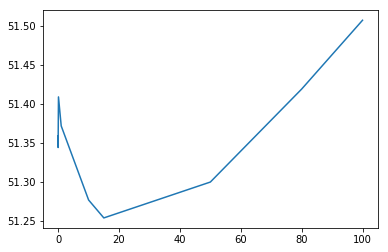

Alpha:  15


In [159]:
###RIDGE REGRESSION##
alpha_val = [0.0001,0.001,0.01,0.1,1,10,15,50,80,100]
mean_acc = []

for j in range(0,len(alpha_val)):
    al = alpha_val[j]
    Kfold = StratifiedKFold(n_splits = 5,shuffle = True)
    mean = 0
    stdv = 0
    for train_index,valid_index in Kfold.split(train_red,train_op):
        feature_train_cv,feature_valid_cv = train_red[train_index],train_red[valid_index]
        op_train_cv,op_valid_cv = train_op[train_index],train_op[valid_index]        
        model = Ridge(alpha =al)
        model.fit(feature_train_cv,op_train_cv)
        op_valid_pred_cv = model.predict(feature_valid_cv)
        mse_val = mean_absolute_error(op_valid_cv,op_valid_pred_cv)
        mean = mean+mse_val        
    mean_acc.append(mean/5)
    


min_val_error = 100
for d in range(0,len(alpha_val)):
    if mean_acc[d]<= min_val_error :
        min_val_error = mean_acc[d]
        al_rid_opt = alpha_val[d]

plt.figure()
plt.plot(alpha_val,mean_acc)
plt.show()

print("Alpha: ",al_rid_opt)

C:\Users\nived\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


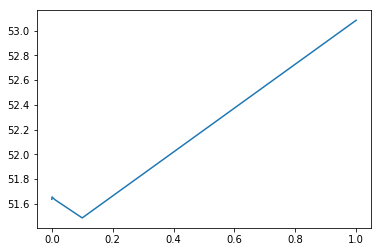

Alpha:  0.1


In [134]:
###LASSO REGRESSION##
alpha_val = [0.0001,0.001,0.01,0.1,1]
mean_acc = []

for j in range(0,len(alpha_val)):
    al = alpha_val[j]
    Kfold = StratifiedKFold(n_splits = 5,shuffle = True)
    mean = 0
    stdv = 0
    for train_index,valid_index in Kfold.split(train_red,train_op):
        feature_train_cv,feature_valid_cv = train_red[train_index],train_red[valid_index]
        op_train_cv,op_valid_cv = train_op[train_index],train_op[valid_index]        
        model = Lasso(alpha =al)
        model.fit(feature_train_cv,op_train_cv)
        op_valid_pred_cv = model.predict(feature_valid_cv)
        mse_val = mean_absolute_error(op_valid_cv,op_valid_pred_cv)
        mean = mean+mse_val        
    mean_acc.append(mean/5)
    


min_val_error = 100
for d in range(0,len(alpha_val)):
    if mean_acc[d]<= min_val_error :
        min_val_error = mean_acc[d]
        al_las_opt = alpha_val[d]

plt.figure()
plt.plot(alpha_val,mean_acc)
plt.show()

print("Alpha: ",al_las_opt)

In [135]:
##Random Forest Regressor


n_estimator  = [10,50,80,100]
depth = [4,50,None]
mean_acc = []

for j in range(0,len(n_estimator)):
    n_est = n_estimator[j]
    mean_acc.append([])
    for k in range(0,len(depth)):
        dep = depth[k]
        Kfold = StratifiedKFold(n_splits = 5,shuffle = True)
        mean = 0
        stdv = 0
        for train_index,valid_index in Kfold.split(train_red,train_op):
            feature_train_cv,feature_valid_cv = train_red[train_index],train_red[valid_index]
            op_train_cv,op_valid_cv = train_op[train_index],train_op[valid_index]        
            model = RandomForestRegressor(n_estimators=n_est, max_depth=dep)
            model.fit(feature_train_cv,op_train_cv)
            op_valid_pred_cv = model.predict(feature_valid_cv)
            mse_val = mean_absolute_error(op_valid_cv,op_valid_pred_cv)
            mean = mean+mse_val        
        mean_acc[j].append(mean/5)
    


min_val_error = 100
for d1 in range(0,len(n_estimator)):
    for d2 in range(0,len(depth)):
        if mean_acc[d1,d2]<= min_val_error :
            min_val_error = mean_acc[d1,d2]
            n_est_opt = n_estimator[d1]
            dep_opt = depth[d2]



print("Number of trees: ",n_est_opt)
print("Depth: ",dep_opt)

C:\Users\nived\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\nived\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\nived\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\nived\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The mi

TypeError: list indices must be integers or slices, not tuple

In [76]:
print(np.shape(train_red))

(22548, 77)


In [137]:
min_val_error = 100
for d1 in range(0,len(n_estimator)):
    for d2 in range(0,len(depth)):
        if mean_acc[d1][d2]<= min_val_error :
            min_val_error = mean_acc[d1][d2]
            n_est_opt = n_estimator[d1]
            dep_opt = depth[d2]


In [138]:
print("Number of trees: ",n_est_opt)
print("Depth: ",dep_opt)

Number of trees:  80
Depth:  50


In [141]:
print(n_estimator)
print(mean_acc)
print(depth)


[10, 50, 80, 100]
[[52.79721374401099, 40.648770954500804, 40.27829172596071], [52.85497737811668, 38.25068940397312, 38.38595363388352], [52.73467546364848, 38.15443378807254, 38.34058180118406], [52.927189334313915, 38.205777257961415, 38.18017547163204]]
[4, 50, None]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

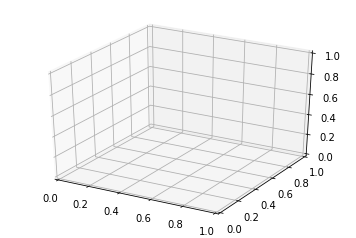

In [142]:
from mpl_toolkits.mplot3d import Axes3D
depth1 = [4,50,100]

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(np.array(n_estimator), np.array(depth1), np.array(mean_acc))

plt.show()

In [163]:
##Evaluate on Validation Set

#Ridge Regression
print('Ridge Regression')
rid = Ridge(alpha = al_rid_opt)
rid.fit(train_red,train_op)

#train eval
train_op_predict_rid = rid.predict(train_red)
mse_train = mean_absolute_error(train_op,train_op_predict_rid)
# print(r2_score(pretraining_train_op,pretraining_train_op_predict_red))
print("MSE for Regression train data: ",mse_train)
print("R2 Score for Train data",r2_score(train_op,train_op_predict_rid))
# print(mse_red/(np.sum(np.absolute(pretraining_train_op))))

#test eval
validation_op_predict_rid = rid.predict(validation_red)
mse_val = mean_absolute_error(validation_op,validation_op_predict_rid)
print("MSE for Ridge Regression Validation data: ",mse_val)
print("R2 Score for Validation data",r2_score(validation_op,validation_op_predict_rid))


#Lasso Regresssion
print('Lasso Regression')
las = Lasso(alpha = al_las_opt)
las.fit(train_red,train_op)

#train eval
train_op_predict_las = las.predict(train_red)
mse_train = mean_absolute_error(train_op,train_op_predict_las)
# print(r2_score(pretraining_train_op,pretraining_train_op_predict_red))
print("MSE for Regression train data: ",mse_train)
print("R2 Score for Train data",r2_score(train_op,train_op_predict_las))
# print(mse_red/(np.sum(np.absolute(pretraining_train_op))))

#test eval
validation_op_predict_las = las.predict(validation_red)
mse_val = mean_absolute_error(validation_op,validation_op_predict_las)
print("MSE for Ridge Regression Validation data: ",mse_val)
print("R2 Score for Validation data",r2_score(validation_op,validation_op_predict_las))

#Decision Tree
print('Random Forest Regression')
rf = RandomForestRegressor(n_estimators=n_est_opt, max_depth=dep_opt)
rf.fit(train_red,train_op)

#train eval
train_op_predict_rf = rf.predict(train_red)
mse_train = mean_absolute_error(train_op,train_op_predict_rf)
# print(r2_score(pretraining_train_op,pretraining_train_op_predict_red))
print("MSE for Regression train data: ",mse_train)
print("R2 Score for Train data",r2_score(train_op,train_op_predict_rf))
# print(mse_red/(np.sum(np.absolute(pretraining_train_op))))

#test eval
validation_op_predict_rf = rf.predict(validation_red)
mse_val = mean_absolute_error(validation_op,validation_op_predict_rf)
print("MSE for Ridge Regression test data: ",mse_val)
print("R2 Score for Test data",r2_score(validation_op,validation_op_predict_rf))

Ridge Regression
MSE for Regression train data:  51.07606718021758
R2 Score for Train data 0.4085038651012475
MSE for Ridge Regression Validation data:  52.167130182753546
R2 Score for Validation data 0.41011180859752605
Lasso Regression
MSE for Regression train data:  51.06149323307085
R2 Score for Train data 0.4073143206010845
MSE for Ridge Regression Validation data:  52.158445432079446
R2 Score for Validation data 0.40874883423045505
Random Forest Regression
MSE for Regression train data:  13.86652641032464
R2 Score for Train data 0.9484812808213915
MSE for Ridge Regression test data:  37.40683430902963
R2 Score for Test data 0.6584452912897516


In [ ]:
##PLOTS
feat_redn = PCA(n_components = 2)
feat_redn.fit(train)
train_red = feat_redn.transform(train)
validation_red = feat_redn.transform(validation)

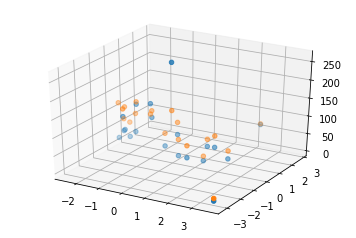

In [180]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(validation_red[:20,0],validation_red[:20,1],validation_op[:20])
ax.scatter(validation_red[:20,0],validation_red[:20,1],validation_op_predict_rf[:20])

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf = ax.plot_surface(np.array(n_estimator), np.array(depth1), np.array(mean_acc))

# plt.show()

In [181]:
#Training
ss = StandardScaler()
ss.fit(training[:,76:82])
Y = ss.transform(training[:,76:82])
training[:,76:82] = Y

Y = ss.transform(test[:,76:82])
test[:,76:82] = Y

feat_redn = PCA(n_components = 77)
feat_redn.fit(training)
training_red = feat_redn.transform(training)
test_red = feat_redn.transform(test)


In [182]:
#Decision Tree
print('Random Forest Regression')
rf = RandomForestRegressor(n_estimators=n_est_opt, max_depth=dep_opt)
rf.fit(training_red,training_op)

#train eval
training_op_predict_rf = rf.predict(training_red)
mse_training = mean_absolute_error(training_op,training_op_predict_rf)
# print(r2_score(pretraining_train_op,pretraining_train_op_predict_red))
print("MSE for Random Forest train data: ",mse_training)
print("R2 Score for Train data",r2_score(training_op,training_op_predict_rf))
# print(mse_red/(np.sum(np.absolute(pretraining_train_op))))

#test eval
test_op_predict_rf = rf.predict(test_red)
mse_test = mean_absolute_error(test_op,test_op_predict_rf)
print("MSE for Random Forest test data: ",mse_test)
print("R2 Score for Test data",r2_score(test_op,test_op_predict_rf))

Random Forest Regression
MSE for Random Forest train data:  12.80949624852602
R2 Score for Train data 0.9557766531580406
MSE for Random Forest test data:  34.31413750845166
R2 Score for Test data 0.6915257856371229


In [88]:
#Complexity Analysis fro Ridge Regression
from sklearn.utils import resample
rid = Ridge(alpha =al_opt)

W=[]
for i in range(0,1000):
    data,data_op = resample(training_red,training_op,replace=False)
    rid.fit(data,data_op)
    data_op_predict = rid.predict(data)
    wc = rid.coef_
    w0 = rid.intercept_
    w = np.append(w0,wc)
    W.append(w)
wmean = np.mean(W,axis=0)
Eout_arr=[]
i_index=0
for i in training_red:
    x = np.append(1,i)
    hg_mean = np.dot(x,wmean)
    eout_x = []
    for j in W:
        eout_x.append(abs((np.dot(j,x))-training_op[i_index]))
    Eout_arr.append(np.mean(eout_x))
    i_index+=1
Eout = np.mean(Eout_arr)
print("Eout: ",Eout)

In [ ]:
#Complexity Analysis for Lasso Regression
las = Lasso(alpha =al_opt)

W=[]
for i in range(0,1000):
    data,data_op = resample(training_red,training_op,replace=False)
    las.fit(data,data_op)
    data_op_predict = las.predict(data)
    wc = las.coef_
    w0 = las.intercept_
    w = np.append(w0,wc)
    W.append(w)
wmean = np.mean(W,axis=0)
Eout_arr=[]
i_index=0
for i in training_red:
    x = np.append(1,i)
    hg_mean = np.dot(x,wmean)
    eout_x = []
    for j in W:
        eout_x.append(abs((np.dot(j,x))-training_op[i_index]))
    Eout_arr.append(np.mean(eout_x))
    i_index+=1
Eout = np.mean(Eout_arr)
print("Eout: ",Eout)

In [90]:
#Complexity Analysis for Random Forest
rid = Ridge(alpha =al_opt)

W=[]
for i in range(0,1000):
    data,data_op = resample(training_red,training_op,replace=False)
    rid.fit(data,data_op)
    data_op_predict = rid.predict(data)
    wc = rid.coef_
    w0 = rid.intercept_
    w = np.append(w0,wc)
    W.append(w)
wmean = np.mean(W,axis=0)
Eout_arr=[]
i_index=0
for i in training_red:
    x = np.append(1,i)
    hg_mean = np.dot(x,wmean)
    eout_x = []
    for j in W:
        eout_x.append(abs((np.dot(j,x))-training_op[i_index]))
    Eout_arr.append(np.mean(eout_x))
    i_index+=1
Eout = np.mean(Eout_arr)
print("Eout: ",Eout)


Eout:  51.35216856762374
